# 📘 AI/ML Assignment 3
## Supervised Learning Models in Practice

**Total Marks: 100**  
**Submission Format:** Single Jupyter Notebook (`.ipynb`)

---
## 📌 General Instructions (Read Carefully)

- This assignment covers **Modules 13–18**.
- Use **Python and scikit-learn only**.
- Do NOT use AutoML, deep learning, or external ML libraries.
- Fix `random_state=42` wherever applicable.
- Plots must be labeled and readable.
- Do not delete or rename cells.

***Classification Dataset:*** https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data/data

***Regresssion Dataset:*** https://www.kaggle.com/datasets/mirichoi0218/insurance

## 🔧 TODO 0: Environment Setup (5 Marks)
**Marks Breakdown:**
- Correct imports (3)
- Clean setup, no unused imports (2)


In [49]:
# TODO: Import all necessary libraries here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import (OneHotEncoder, PolynomialFeatures,
                                   LabelEncoder, StandardScaler)
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC, SVR
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                              mean_squared_error, mean_absolute_error, r2_score,
                             precision_score, recall_score)

# Configure matplotlib for slightly nicer default plots
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['axes.grid'] = True

# 🔵 PART A: Regression Task (45 Marks)
You will work with the provided **regression dataset**.


## TODO A1: Dataset Loading and Understanding (5 Marks)
**You must:**
- Load the dataset
- Show shape and column names
- Identify target variable

**Marks:** Data loading (2), Explanation (3)


In [50]:
# TODO: Load regression dataset
reg_data = '/content/sample_data/insurance.csv'
reg_df = pd.read_csv(reg_data, header=0)

print(reg_df.shape)
print(reg_df.columns)
print("Target variable", 'charges')
reg_df.head()

(1338, 7)
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')
Target variable charges


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## TODO A2: Exploratory Data Analysis (EDA) (5 Marks)
**You must:**
- Show descriptive statistics
- Plot correlation heatmap
- Plot at least one feature vs target

**Marks:** Plots (3), Interpretation (2)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


None

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


Correlation Matrix: 
               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


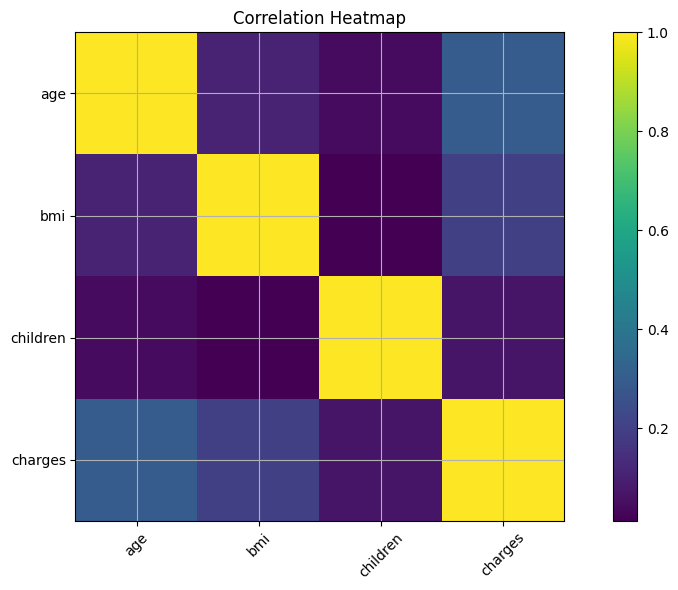

/tmp/ipython-input-1020855980.py:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


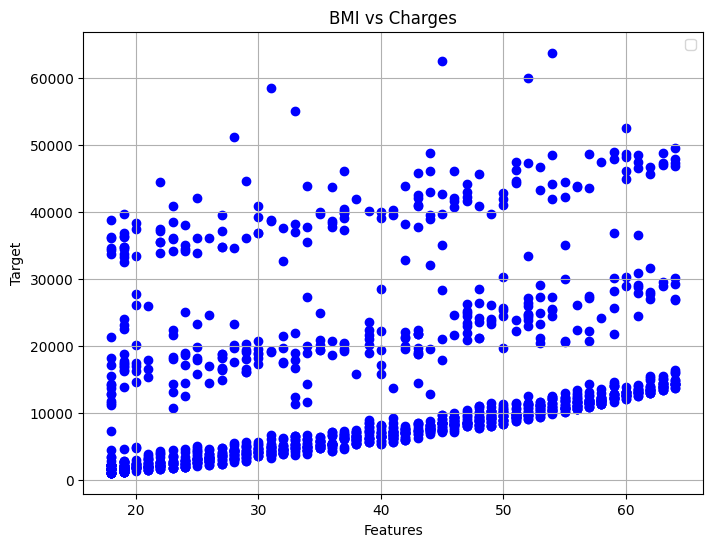

In [51]:
# TODO: Perform EDA
display(reg_df.info())
display(reg_df.describe().T)

numerical_col = ['age', 'bmi', 'children', 'charges']

corr_matrix = reg_df[numerical_col].corr()
print("Correlation Matrix: ")
print(corr_matrix)

# Plot correlation matrix using matplotlib
plt.figure(figsize=(10,6))
plt.imshow(corr_matrix,  interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=45)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

# Viualize the Ploting of feature vs target

plt.scatter(reg_df['age'], reg_df['charges'], color='blue')

plt.xlabel("Features")
plt.ylabel("Target")
plt.title("BMI vs Charges")
plt.legend()
plt.grid(True)
plt.show()

## TODO A3: Feature Preparation (5 Marks)
**You must:**
- Train-test split
- Scaling (if applicable)

**Marks:** Correct split (3), Explanation (2)


In [52]:
# TODO: Prepare features
X = reg_df.drop("charges", axis=1)
y = reg_df["charges"]

# Preprocessing
X_encoded = pd.get_dummies(X, drop_first=True)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Scaling features
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## TODO A4: Multiple Linear Regression (8 Marks)
**You must:**
- Train model
- Evaluate using RMSE, MAE, R²

**Marks:** Model (4), Metrics (4)


In [53]:
# TODO: Multiple Linear Regression

mlr_model = LinearRegression()

# Fit
mlr_model.fit(X_train_scaled, y_train)

# Prediction
y_mlr_pred = mlr_model.predict(X_test_scaled)

# Evaluate
mae = mean_absolute_error(y_test, y_mlr_pred)
mse = mean_squared_error(y_test, y_mlr_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_mlr_pred)

print('MAE: ', mae)
print('RMSE: ', rmse)
print('R2 : ', r2)
print()

MAE:  4181.194473753651
RMSE:  5796.284659276274
R2 :  0.7835929767120722



## TODO A5: Polynomial Regression (7 Marks)
**You must:**
- Apply polynomial features
- Compare with linear regression

**Marks:** Implementation (4), Comparison (3)


In [54]:
# TODO: Polynomial Regression
model = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
   ('lin_reg', LinearRegression())
])

model.fit(X_train, y_train)

y_test_h_pred = model.predict(X_test)

print("Polynomial Regression Performance")
print("mae_test", mean_absolute_error(y_test, y_test_h_pred))
print("rmse_test", np.sqrt(mean_squared_error(y_test, y_test_h_pred)))
print("r2_score_test", r2_score(y_test, y_test_h_pred))


Polynomial Regression Performance
mae_test 2729.5001336394594
rmse_test 4551.132385233201
r2_score_test 0.8665830903164835


## Here the r2 score of Polynomial Regression is greater than the r2 score of Multiple Linear Regression

## TODO A6: Support Vector Regression (7 Marks)
**You must:**
- Train SVR (RBF kernel)
- Evaluate performance
- Justify kernel choice

**Marks:** Model (4), Justification (3)


In [55]:
# TODO: Support Vector Regression

C_values = [100, 300, 500, 1000]

for c in C_values:
    svr_model = SVR(kernel='rbf', C=c, gamma='scale')

    svr_model.fit(X_train_scaled, y_train)
    y_svr_pred = svr_model.predict(X_test_scaled)

    mae_srv = mean_absolute_error(y_test, y_svr_pred)
    mse_srv = mean_squared_error(y_test, y_svr_pred)
    rmse_srv = np.sqrt(mse_srv)
    r2_srv = r2_score(y_test, y_svr_pred)

    print(f"For C value {c}")
    print('MAE: ', mae_srv)
    print('RMSE: ', rmse_srv)
    print('R2 : ', r2_srv)
    print()

For C value 100
MAE:  5868.890476887904
RMSE:  10824.024948602602
R2 :  0.24534316665782363

For C value 300
MAE:  4067.5820442273543
RMSE:  8652.539067099888
R2 :  0.5177646117407607

For C value 500
MAE:  3543.8153337726835
RMSE:  7715.481921173377
R2 :  0.6165594352755945

For C value 1000
MAE:  2800.2146225412275
RMSE:  6268.604307955491
R2 :  0.7468874650882389



# Justification of RBF kernel:

### Here in this data there is no linear relation between the features and classes so, for the data RBF kernel is suitable.

## TODO A7: Random Forest Regressor (8 Marks)
**You must:**
- Train Random Forest
- Evaluate model

**Marks:** Model (4), Evaluation (4)


In [56]:
# TODO: Random Forest Regressor
rf_reg = RandomForestRegressor(
    n_estimators = 300,
    random_state = 42,
    n_jobs = -1
)
rf_reg.fit(X_train_scaled, y_train)

y_rf_pred = rf_reg.predict(X_test_scaled)

#Evaluate
mae_rf = mean_absolute_error(y_test, y_rf_pred)
mse_rf = mean_squared_error(y_test, y_rf_pred)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_rf_pred)

print('MAE: ', mae_rf)
print('RMSE: ', rmse_rf)
print('R2 : ', r2_rf)

MAE:  2553.6090663943305
RMSE:  4587.882507886067
R2 :  0.8644197237303526


# 🟠 PART B: Classification Task (45 Marks)
You will work with the provided **classification dataset**.


## TODO B1: Dataset Understanding (5 Marks)
**You must:**
- Load dataset
- Show class distribution
- Comment on imbalance

**Marks:** Analysis (3), Explanation (2)


In [57]:
# TODO: Load classification dataset
clf_data = '/content/sample_data/loan_data.csv'
clf_df = pd.read_csv(clf_data)

print(clf_df.shape)
print(clf_df.columns)


#Class Distribution
print(clf_df['loan_status'].value_counts())

(45000, 14)
Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')
loan_status
0    35000
1    10000
Name: count, dtype: int64


# Comment on class imbalance

### Here we can see a class imbalance of target feature "loan_status". Here most loans are rejected (350000) and less amount of loans are approved (10000).

## TODO B2: Exploratory Data Analysis (5 Marks)
**You must:**
- Plot class counts
- Plot at least one feature vs class

**Marks:** Plots (5),


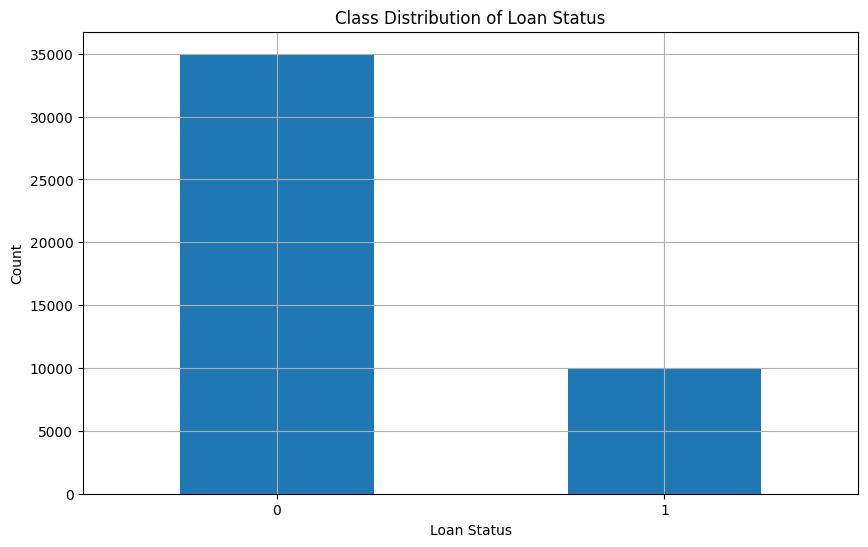

Text(0.5, 1.0, 'Ploting of Loan Status on Person Education & Person Income')

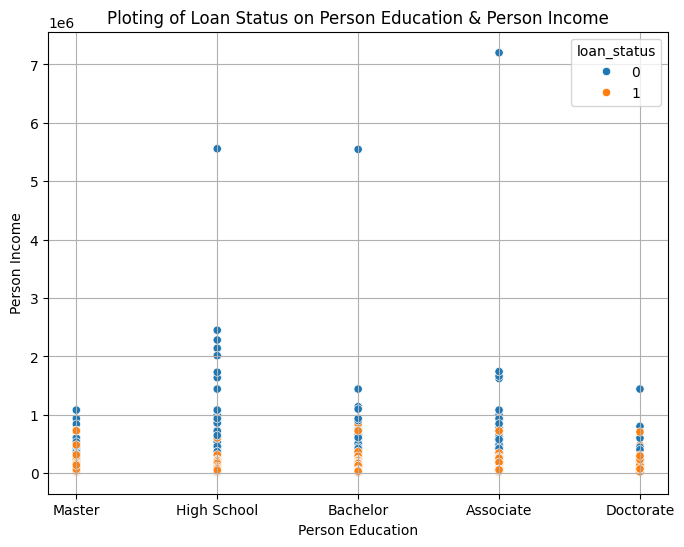

In [58]:
# TODO: Classification EDA

# Plot class counts
plt.figure(figsize=(10,6))
clf_df['loan_status'].value_counts().plot(kind='bar')
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.title("Class Distribution of Loan Status")
plt.xticks(rotation=0)
plt.show()

# Plot at least one feature vs class
sns.scatterplot(data= clf_df, x='person_education', y='person_income', hue='loan_status')
plt.xlabel("Person Education")
plt.ylabel("Person Income")
plt.title("Ploting of Loan Status on Person Education & Person Income")

## TODO B3: Feature Preparation (5 Marks)
**You must:**
- Encoding (if needed)
- Scaling
- Train-test split with stratification




In [59]:
# TODO: Prepare classification features
X_clf = clf_df.drop('loan_status', axis=1)
y_clf = clf_df['loan_status']

# Encoding
X_clf_encoded = pd.get_dummies(X_clf, drop_first= True)

#Train test split
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf_encoded, y_clf,
                                                    test_size=0.2, random_state=42, stratify=y_clf)
#Scaling
scaler = StandardScaler()

X_clf_train_scaled = scaler.fit_transform(X_train_clf)
X_clf_test_scaled = scaler.transform(X_test_clf)

## TODO B4: Logistic Regression with L2 (8 Marks)
**You must:**
- Train Logistic Regression
- Evaluate using Accuracy, Precision, Recall
- Show Confusion Matrix

**Marks:** Model (4), Metrics (4)


In [60]:
# TODO: Logistic Regression
log_reg = LogisticRegression(penalty="l2", max_iter=1000, C=1.0, random_state=42)
log_reg.fit(X_clf_train_scaled, y_train_clf)

# Predictions
y_log_pred = log_reg.predict(X_clf_test_scaled)

# Metrics
acc_log = accuracy_score(y_test_clf, y_log_pred)
prec_log = precision_score(y_test_clf, y_log_pred)
rec_log = recall_score(y_test_clf, y_log_pred)
cm_log = confusion_matrix(y_test_clf, y_log_pred)


print("Logistic Regression Performance:")
print("Accuracy :", acc_log)
print("Precision:", prec_log)
print("Recall   :", rec_log)

print("\nConfusion Matrix:\n", cm_log)

Logistic Regression Performance:
Accuracy : 0.8997777777777778
Precision: 0.7895569620253164
Recall   : 0.7485

Confusion Matrix:
 [[6601  399]
 [ 503 1497]]


## TODO B5: Support Vector Machine (7 Marks)
**You must:**
- Train SVM (Linear or RBF)
- Evaluate

**Marks:** Model (4), Evaluation (3)


In [61]:
# TODO: SVM Classification
# Train Linear
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_clf_train_scaled, y_train_clf)

# Predict
y_svm_pred = svm_model.predict(X_clf_test_scaled)

# Evaluation
acc_svm = accuracy_score(y_test_clf, y_svm_pred)
prec_svm = precision_score(y_test_clf, y_svm_pred)
rec_svm = recall_score(y_test_clf, y_svm_pred)
cm_svm = confusion_matrix(y_test_clf, y_svm_pred)

print("SVM (Linear) Performance:")
print("Accuracy:", acc_svm)
print("Precision:", prec_svm)
print("Recall:", rec_svm)

print("\nConfusion Matrix:")
print(cm_svm)

SVM (Linear) Performance:
Accuracy: 0.9004444444444445
Precision: 0.7939297124600639
Recall: 0.7455

Confusion Matrix:
[[6613  387]
 [ 509 1491]]


## TODO B6: Naive Bayes (5 Marks)
**You must:**
- Choose correct NB variant



In [62]:
# TODO: Naive Bayes
#Gaussian Naive Bayse
nb_model = GaussianNB()
nb_model.fit(X_clf_train_scaled, y_train_clf)

# predict
y_nb_pred = nb_model.predict(X_clf_test_scaled)

# Evaluation
acc_nb = accuracy_score(y_test_clf, y_nb_pred)
prec_nb = precision_score(y_test_clf, y_nb_pred)
rec_nb = recall_score(y_test_clf, y_nb_pred)
cm_nb = confusion_matrix(y_test_clf, y_nb_pred)

print("Naive Bayes (Gaussian) Performance:")
print("Accuracy:", acc_nb)
print("Precision:", prec_nb)
print("Recall:", rec_nb)

print("\nConfusion Matrix:")
print(cm_nb)

Naive Bayes (Gaussian) Performance:
Accuracy: 0.753
Precision: 0.47310012062726176
Recall: 0.9805

Confusion Matrix:
[[4816 2184]
 [  39 1961]]


## TODO B7: K-Nearest Neighbors (5 Marks)
**You must:**
- Try multiple K values
- Plot accuracy vs K

**Marks:** Experiment (3), Plot & choice (2)


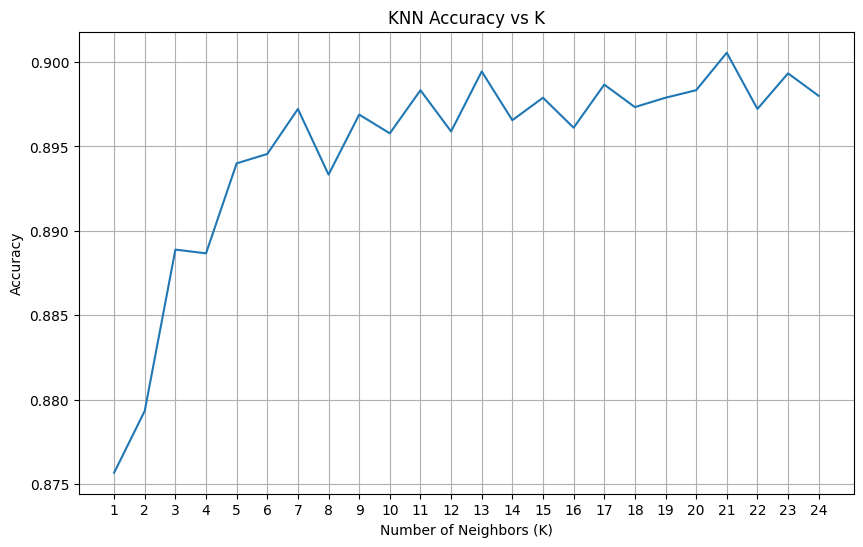

Best K = 21
Best Accuracy = 0.901


In [63]:
# TODO: KNN
k_values = range(1, 25)
acc = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_clf_train_scaled, y_train_clf)
    y_knn_pred = knn.predict(X_clf_test_scaled)
    acc.append(accuracy_score(y_test_clf, y_knn_pred))

# Plot accuracy vs K
plt.figure(figsize=(10,6))
plt.plot(k_values, acc)
plt.title("KNN Accuracy vs K")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Best K
best_k = k_values[np.argmax(acc)]
best_acc = max(acc)

print(f"Best K = {best_k}")
print(f"Best Accuracy = {best_acc:.3f}")


## TODO B8: Random Forest Classifier (5 Marks)
**You must:**
- Train model
- Show feature importance

**Marks:** Model (3), Interpretation (2)


In [64]:
# TODO: Random Forest Classifier

rf_clf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)

rf_clf.fit(X_clf_train_scaled, y_train_clf)

# Predictions
y_rf_pred = rf_clf.predict(X_clf_test_scaled)

# Evaluation
acc_rf = accuracy_score(y_test_clf, y_rf_pred)
prec_rf = precision_score(y_test_clf, y_rf_pred)
rec_rf = recall_score(y_test_clf, y_rf_pred)

print("Random Forest Classifier Performance:")
print("Accuracy:", acc_rf)
print("Precision:", prec_rf)
print("Recall:", rec_rf)

# Feature importance
feature_importance = pd.Series(rf_clf.feature_importances_,
    index=X_train_clf.columns).sort_values(ascending=False)
feature_importance.head(10)

Random Forest Classifier Performance:
Accuracy: 0.9285555555555556
Precision: 0.8956268221574344
Recall: 0.768


,0
previous_loan_defaults_on_file_Yes,0.217225
loan_percent_income,0.165635
loan_int_rate,0.156356
person_income,0.123799
loan_amnt,0.061103
person_home_ownership_RENT,0.056478
credit_score,0.054742
person_age,0.031789
person_emp_exp,0.028473
cb_person_cred_hist_length,0.026470


# 🧠 Final Reflection (5 Marks)
**Answer briefly:**
- Best regression model and why
- Best classification model and why
- One real-world deployment scenario


## TODO: Write your reflection here

## Best Regression model:
After performing sevarel train and testing in my case, Polynomial Regression is best for the given dataset. Because the lowest value of RMSE(4551.13) and the highest value of R2(0.867). It handles the non-linear relationship of feature and classes.

## Best Classidication model:
The Random Forest Classifier is the best model among all the Classification models. We get the highest precision(0.896) and reall(0.768).

## In Real-World:
There two models can be used in Banking system. The regression model can be used to estimate the risk of giving loan and the classification model can be used to make decision of approving loan or not.